#Sentiment Analysis using DistilBERT, encoder-only Transformer LLM

#DistilBERT is a smaller, faster, and lighter version of BERT, created through a process called knowledge distillation

To import the DistilBERT model in Python:
can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT

For this, as shown further below, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [8]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("./feedbacks.csv", header=None)

In [9]:
df.head()

,0
0,Your products are excellent. I really love the...
1,The customer service team in New York was help...
2,The new features in the latest release are fan...
3,The product didn't meet my expectations and I'...
4,Your products are not good. I really don't lik...


# Load Pre-Trained DistilBERT model and Tokenizer

In [4]:
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/opt/miniconda3/envs/my-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-25 20:44:05.878042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


# Load DistilBERT Sentiment Analysis Pipeline

In [6]:
!pip install tf-keras

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.5.23 requires tokenizers<=0.20.3,>=0.13.2, but you have tokenizers 0.21.1 which is incompatible.
opentelemetry-proto 1.31.1 requires protobuf<6.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
grpcio-tools 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.


In [10]:
#This method assigned a STAR rating automatically.
#So, we take unlabeled data, perform sentiment analysis using DistilBERT and it gives a score!""

# Load DistilBERT sentiment analysis pipeline
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first (and only) column in each row
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})

# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print()  # Add a blank line for readability

# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


Device set to use mps:0


Text: Your products are excellent. I really love the quality! However delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment Score: 0.6390811800956726
Sentiment Label: 4 stars

Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Score: 0.5543172359466553
Sentiment Label: 4 stars

Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Score: 0.8357023596763611
Sentiment Label: 5 stars

Text: The product didn't meet my expectations and I'm disappointed. I hope you can address the issues in Chicago. My email address is emailme@email.com
Sentiment Score: 0.557937741279602
Sentiment Label: 2 stars

Text: Your products are not good. I really don't like the quality! However delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment Score: 0.5892030596733093
Sentiment Label: 2 stars

Tex

# Exploratory Data Analysis

In [11]:
sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.639081,4 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835702,5 stars
3,The product didn't meet my expectations and I'...,0.557938,2 stars
4,Your products are not good. I really don't lik...,0.589203,2 stars


Word Cloud

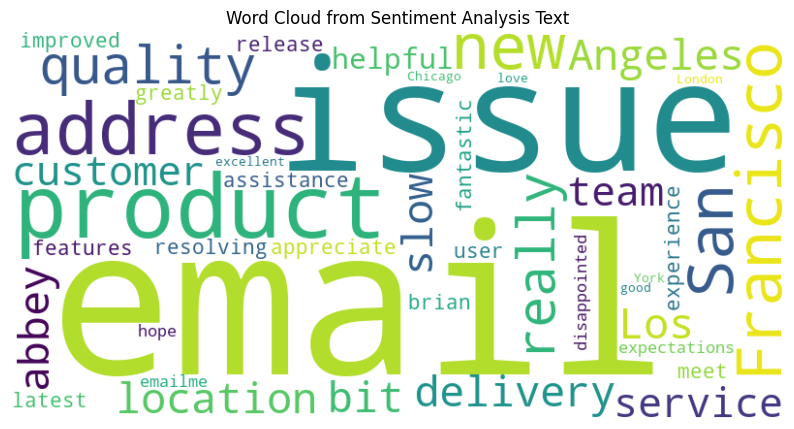

In [12]:
from wordcloud import WordCloud

# Assumptions: already performed sentiment analysis and have sentiment_df_bert DataFrame

# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['Text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()


Pie Chart

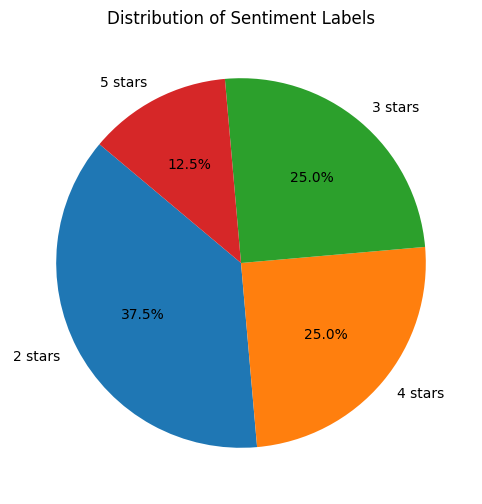

In [13]:
# Count the occurrences of each sentiment label
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()

Bar Chart

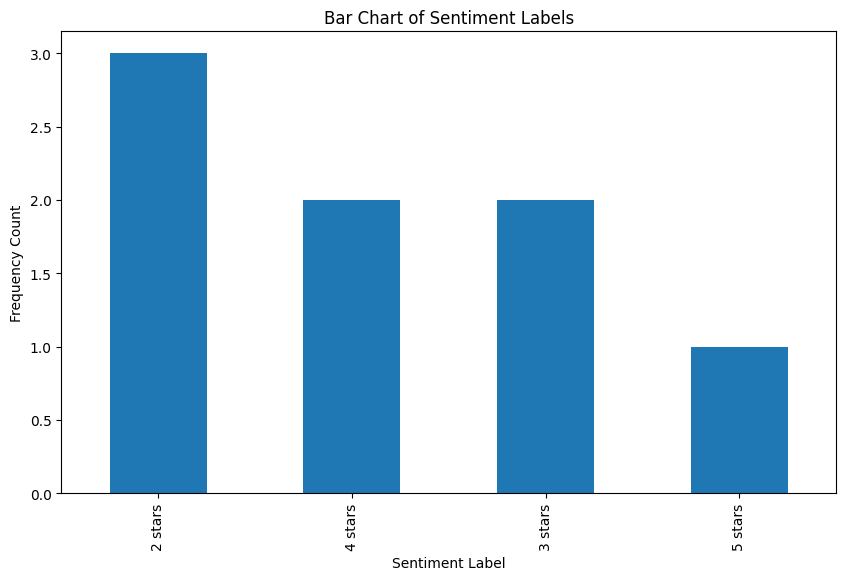

In [14]:
# Count the occurrences of each sentiment label for visualization
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()